# Getting Started: PyProcar's `bandsplot` Function

This tutorial provides a comprehensive introduction to plotting band structures using PyProcar's `bandsplot` function. You'll learn about all the main arguments, visualization modes, caching options, and plotting configurations.

## What You'll Learn

- **Core `bandsplot` arguments** and their purposes
- **Different visualization modes** for band structure analysis
- **Caching functionality** to speed up repeated plotting
- **Plotting configurations** for customizing appearance
- **Best practices** for different analysis scenarios

## Prerequisites

- Basic understanding of electronic band structures
- PyProcar installed in your environment
- VASP calculation data (we'll use SrVO3 example data)

## Overview of `bandsplot` Function

The `bandsplot` function is PyProcar's main tool for band structure visualization. Its basic syntax is:

```python
pyprocar.bandsplot(
    code='vasp',           # DFT code used
    dirname='.',           # Directory with calculation files
    mode='plain',          # Visualization mode
    fermi=None,           # Fermi energy
    # ... many other options
)
```

## 1. Setup and Data Loading

Let's start by importing PyProcar and loading example data. We'll use SrVO3 band structure data from a VASP calculation to demonstrate all the features.

In [2]:
# Import required libraries
from pathlib import Path
import pyprocar

CURRENT_DIR = Path(".").resolve()
REL_PATH = "data/examples/bands/non-spin-polarized"
pyprocar.download_from_hf(relpath=REL_PATH, output_path=CURRENT_DIR)
DATA_DIR = CURRENT_DIR / REL_PATH
print(f"Data downloaded to: {DATA_DIR}")

Data already exists at C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\00-band_structure\data\examples\bands\non-spin-polarized
Data downloaded to: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\00-band_structure\data\examples\bands\non-spin-polarized


## 2. Core Arguments of `bandsplot`

Before exploring different modes, let's understand the essential arguments of the `bandsplot` function:

### Essential Arguments

| Argument | Type | Description | Example |
|----------|------|-------------|---------|
| `code` | str | DFT software used | `'vasp'`, `'qe'`, `'abinit'` |
| `dirname` | str | Path to calculation files | `'.'`, `'/path/to/data'` |
| `mode` | str | Visualization mode | `'plain'`, `'parametric'`, `'overlay'` |
| `fermi` | float | Fermi energy (eV) | `5.599` |

### Optional Arguments

| Argument | Type | Description | Default |
|----------|------|-------------|---------|
| `atoms` | list | Atom indices for projection | `None` |
| `orbitals` | list | Orbital indices for projection | `None` |
| `spins` | list | Spin channels | `None` |
| `savefig` | str | Save plot filename | `None` |
| `title` | str | Plot title | `None` |



## 3. Basic Usage - Plain Mode

The **plain mode** is the simplest way to visualize band structures. It shows clean band lines without projections.

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

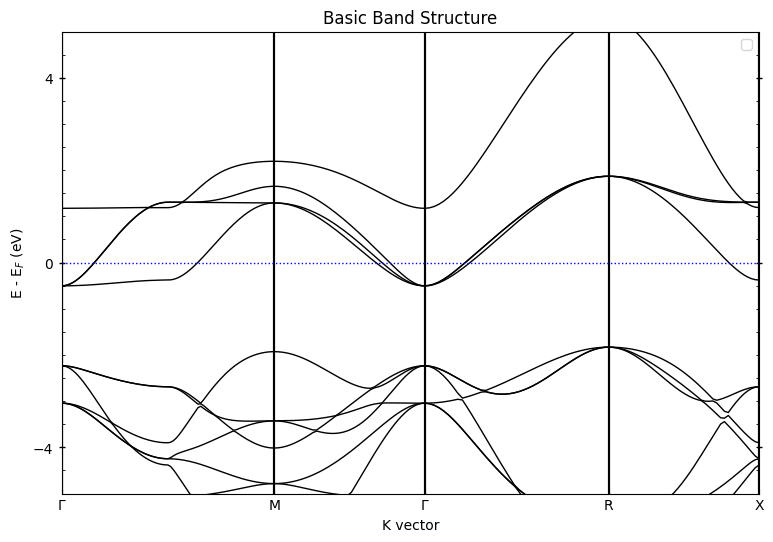

✅ Basic plot created with essential arguments only


In [3]:
# Basic bandsplot usage - showing essential arguments
pyprocar.bandsplot(
    code="vasp",           # Required: DFT software used
    dirname=DATA_DIR,      # Required: Directory with calculation files  
    mode="plain",          # Visualization mode
    fermi=5.3017,        # Fermi energy in eV (shifts energy reference)
    elimit=[-5,5],
    title="Basic Band Structure",  # Optional: add a title
    use_cache=False,
    verbose=2
)

print("✅ Basic plot created with essential arguments only")

## 4. Visualization Modes Overview

PyProcar offers several visualization modes for different analysis needs:

| Mode | Purpose | Key Arguments | Use Case |
|------|---------|---------------|----------|
| `'plain'` | Basic band plot | None extra | Publication plots, general overview |
| `'parametric'` | Projected bands | `atoms`, `orbitals`, `spins` | Analyzing specific contributions |
| `'scatter'` | Point-based plot | `atoms`, `orbitals`, `spins` | Discrete contributions |
| `'overlay'` | Custom overlays | `items` | Comparing multiple projections |
| `'overlay_species'` | Compare elements | `orbitals`, `spins` | Multi-element systems |
| `'overlay_orbitals'` | Compare orbitals | `atoms`, `spins` | Orbital analysis |


## 5. Scatter/Parametric Mode - Projected Band Structures

**Parametric mode** shows atomic/orbital contributions through band thickness or color intensity.

### Orbital Indexing Reference
- **s**: 0
- **p**: 1, 2, 3 (px, py, pz)  
- **d**: 4, 5, 6, 7, 8 (d orbitals)
- **f**: 9, 10, 11, 12, 13, 14, 15 (f orbitals)

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[]
Plotting bands in parametric mode


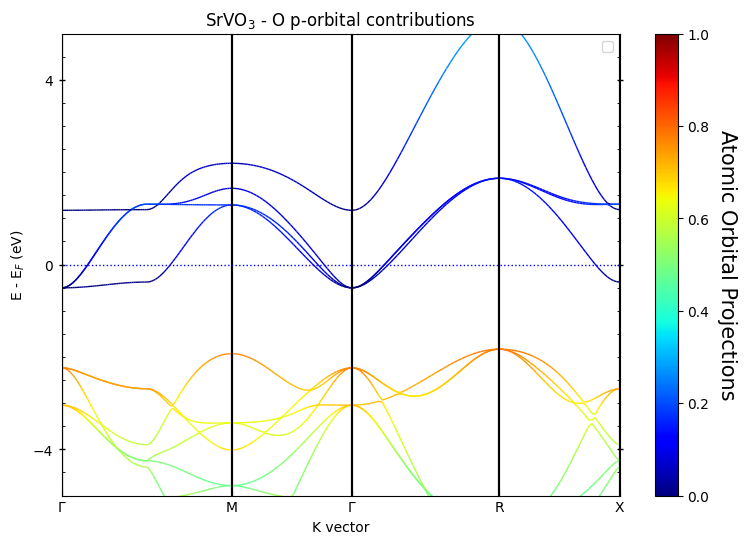

📊 Parametric mode: Band thickness/color shows d-orbital contribution strength
If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[]
Plotting bands in scatter mode


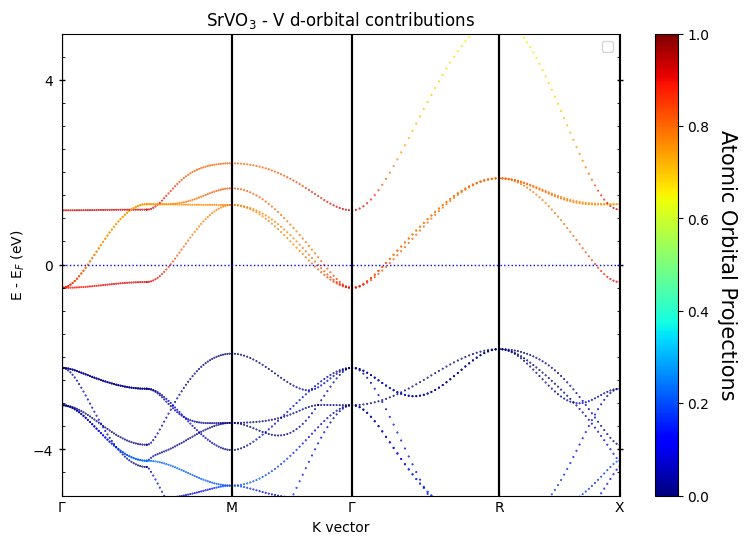

(<Figure size 900x600 with 2 Axes>,
 <Axes: title={'center': 'SrVO$_3$ - V d-orbital contributions'}, xlabel='K vector', ylabel='E - E$_F$ (eV)'>)

In [4]:
# Parametric mode requires projection arguments
pyprocar.bandsplot(
    code="vasp",
    dirname=DATA_DIR,
    mode="parametric",
    fermi=5.3017,
    elimit=[-5,5],
    atoms=[2,3,4],                # Project onto all the Oxygen atoms
    orbitals=[1,2,3], # p orbitals (indices 1-3) 
    title="SrVO$_3$ - O p-orbital contributions",
    quiet_welcome=True
)


print("📊 Parametric mode: Band thickness/color shows d-orbital contribution strength")


pyprocar.bandsplot(
    code="vasp",
    dirname=DATA_DIR,
    mode="scatter",
    fermi=5.3017,
    elimit=[-5,5],
    atoms=[1],                # Project onto all the Oxygen atoms
    orbitals=[4,5,6,7,8], # p orbitals (indices 1-3) 
    title="SrVO$_3$ - V d-orbital contributions",
    quiet_welcome=True
)

## 6. The Cache Argument - Speeding Up Repeated Plots

PyProcar by default caches parsed data to speed up repeated plotting with different parameters. This cached data is stored in pkl files. This is especially useful when experimenting with different visualization options or when the system is very large.

### How Caching Works
1. **First run**: PyProcar reads and parses all calculation files. The data is then stored in pkl files within the calculation directory.
2. **Subsequent runs**: PyProcar loads cached data (much faster)
3. **Cache location**: Stored in the calculation directory

First run:
If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[]
Plotting bands in plain mode


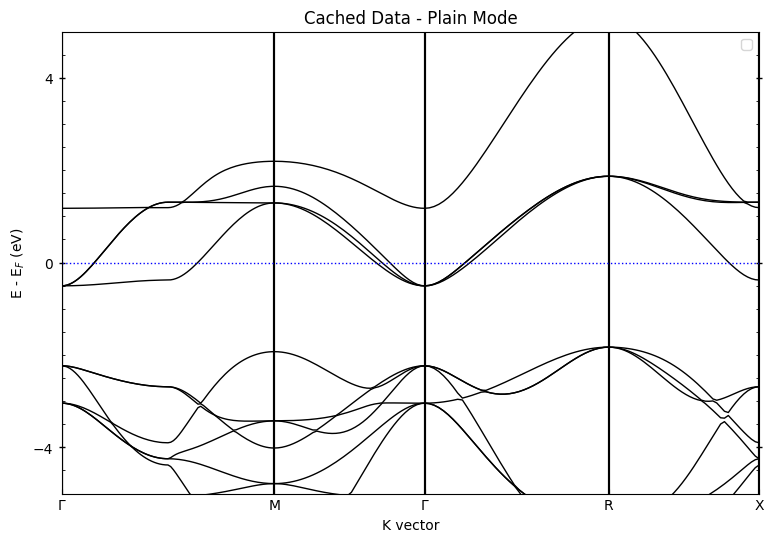

(<Figure size 900x600 with 1 Axes>,
 <Axes: title={'center': 'Cached Data - Plain Mode'}, xlabel='K vector', ylabel='E - E$_F$ (eV)'>)

In [5]:
# First plot - data will be parsed and cached
print("First run:")
pyprocar.bandsplot(
    code="vasp",
    dirname=DATA_DIR,
    mode="plain",
    fermi=5.3017,
    elimit=[-5,5],
    cache=False,  # Enable caching (default is True)
    title="Cached Data - Plain Mode",
    quiet_welcome=True
)

## 7. Overlay Modes - Comparing Multiple Contributions

Overlay modes allow you to compare different contributions on the same plot. Each contribution gets a different color and appears in the legend.

### Available Overlay Modes
- **`overlay_species`**: Compare different atomic species
- **`overlay_orbitals`**: Compare different orbital types  
- **`overlay`**: Custom user-defined comparisons

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[]
Plotting bands in overlay species mode


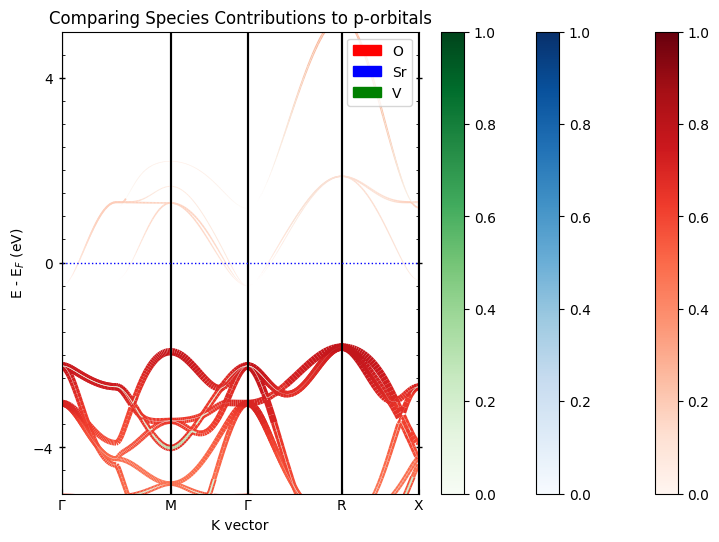

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[]
Plotting bands in overlay orbitals mode


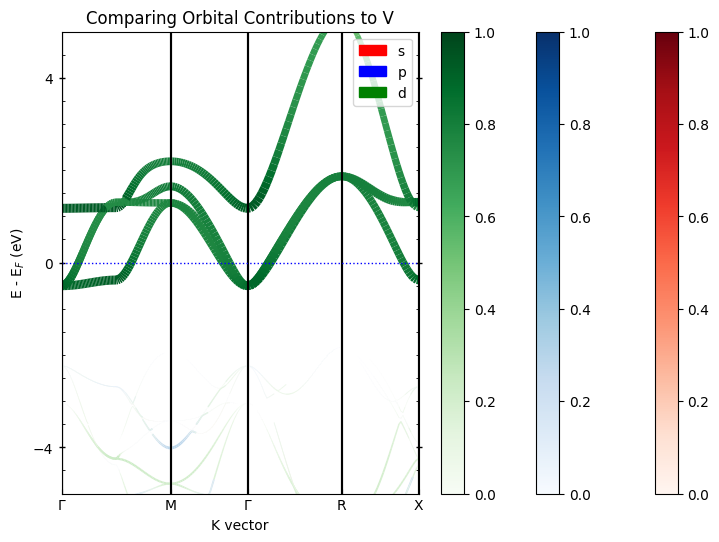

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[]
Plotting bands in overlay mode


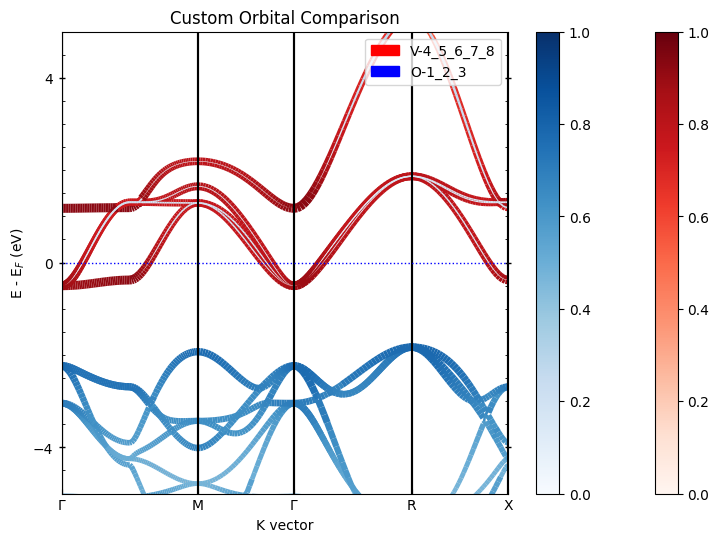

🎨 Overlay modes: Each contribution gets a unique color in the legend


In [6]:
# overlay_orbitals: Compare different orbital types
pyprocar.bandsplot(
    code="vasp",
    dirname=DATA_DIR, 
    mode="overlay_species",
    fermi=5.3017,
    orbitals=[1,2,3],
    elimit=[-5,5],
    title="Comparing Species Contributions to p-orbitals",
    quiet_welcome=True
)

# overlay_orbitals: Compare different orbital types
pyprocar.bandsplot(
    code="vasp",
    dirname=DATA_DIR, 
    mode="overlay_orbitals",
    fermi=5.3017,
    elimit=[-5,5],
    atoms=[1],  # V atom
    title="Comparing Orbital Contributions to V",
    quiet_welcome=True
)

# overlay: Custom comparisons using the items argument
items = {
    "V": [1,2,3],        # s orbital
    "O": [1,2,3],   # p orbitals  
    "V": [4,5,6,7,8] # d orbitals
}

pyprocar.bandsplot(
    code="vasp",
    dirname=DATA_DIR,
    mode="overlay", 
    fermi=5.3017,
    elimit=[-5,5],
    items=items,  # Custom orbital groupings
    title="Custom Orbital Comparison",
    quiet_welcome=True
)

print("🎨 Overlay modes: Each contribution gets a unique color in the legend")

## 8. Plotting Configurations - Customizing Appearance

PyProcar provides extensive options to customize plot appearance through various configuration arguments.

### Key Configuration Arguments

| Category | Arguments | Description |
|----------|-----------|-------------|
| **Labels** | `title`, `xlabel`, `ylabel` | Plot titles and axis labels |
| **Energy** | `fermi`, `elimit` | Energy reference and plot range |
| **Colors** | `cmap`, `clim` | Colormap and color limits |
| **Size** | `markersize`, `linewidth` | Point and line sizes |
| **Output** | `savefig`, `dpi` | Save options |

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
____________________________________________________________________________________________________
plot_type : PlotType.BAND_STRUCTURE
custom_settings : {}
modes : ['plain', 'parametric', 'scatter', 'atomic', 'overlay', 'overlay_species', 'overlay_orbitals']
color : black
spin_colors : ('blue', 'red')
colorbar_title : Atomic Orbital Projections
colorbar_title_size : 15
colorbar_title_padding : 20
colorbar_tick_labelsize : 10
cmap : jet
clim : (0.0, 1.0)
fermi_color : blue
fermi_linestyle : dotted
fermi_linewidth : 1
grid : False
grid_axis : both
grid_color : grey
grid_linestyle : solid
grid_linewidth : 1
grid_which : major
label : ('$\\uparrow$', '$\\downarrow$')
legend : True
linestyle : ('solid', 'dashed')
linewidth : (1.0, 1.0)
marker : ('o', 'v', '^', 'D')
markersize : (0.2, 0.2)
opacity : (1.0, 1.0)
plot_color_bar : True
sa

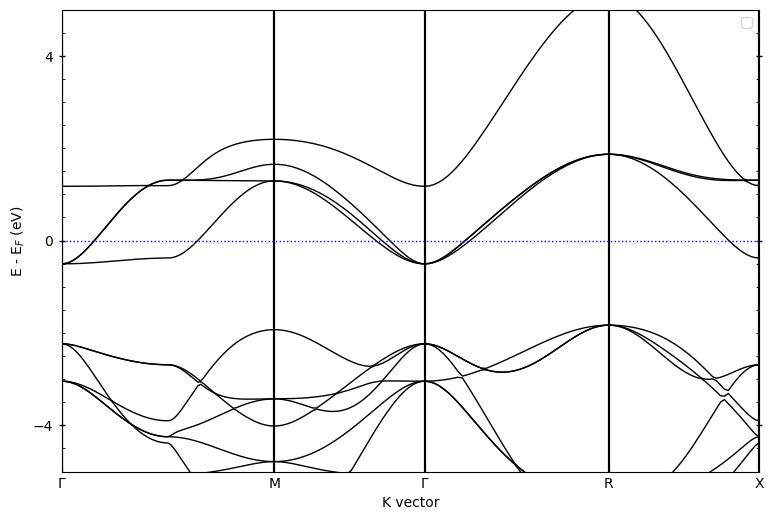

(<Figure size 900x600 with 1 Axes>,
 <Axes: xlabel='K vector', ylabel='E - E$_F$ (eV)'>)

In [7]:
pyprocar.bandsplot(
    code="vasp",
    dirname=DATA_DIR,
    mode="plain", 
    fermi=5.3017,
    elimit=[-5,5],
    print_plot_opts=True,
    quiet_welcome=True
)

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[]
Plotting bands in plain mode


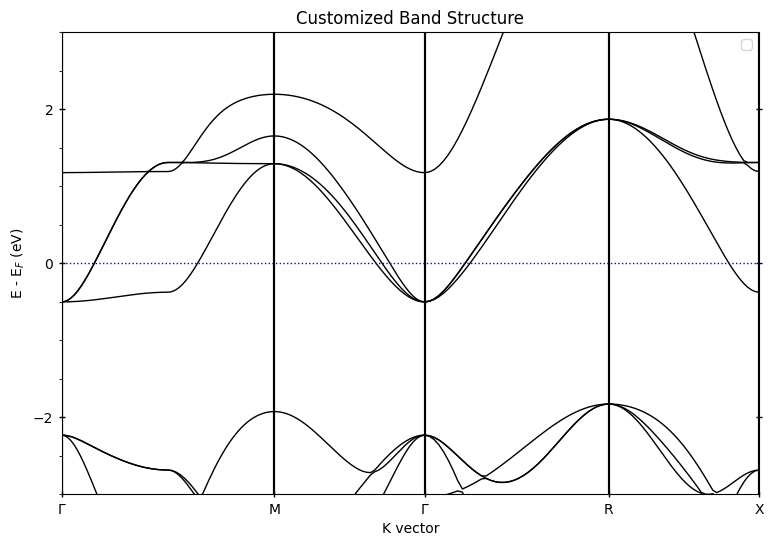

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
[]
Plotting bands in parametric mode


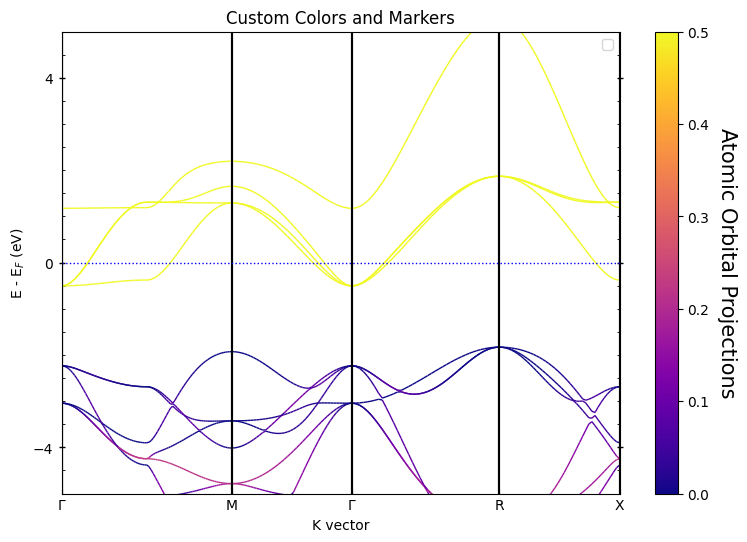

🎨 Configuration options allow full customization of plot appearance


In [10]:
# Example 1: Customizing energy range and labels
pyprocar.bandsplot(
    code="vasp",
    dirname=DATA_DIR,
    mode="plain", 
    fermi=5.3017,
    elimit=[-3, 3],  # Energy range: -3 to +3 eV around Fermi
    title="Customized Band Structure",
    minor_y_tick_params={'direction': 'inout', 'width': 1, 'length': 5, 'labelright': False, 'right': True, 'left': True},
    multiple_locator_y_minor_value=0.5,
    xlabel="Wave Vector",
    ylabel="Energy - E_F (eV)",
    quiet_welcome=True
)

# Example 2: Customizing colors and markers for parametric plot
pyprocar.bandsplot(
    code="vasp",
    dirname=DATA_DIR,
    mode="parametric",
    fermi=5.3017,
    elimit=[-5,5],
    atoms=[1],
    orbitals=[4,5,6,7,8],
    cmap="plasma",     # Different colormap
    clim=[0, 0.5],     # Color scale limits  
    markersize=2,      # Smaller markers
    title="Custom Colors and Markers",
    quiet_welcome=True
)

print("🎨 Configuration options allow full customization of plot appearance")

## 9. Saving and Output Options

PyProcar provides several options for saving plots and controlling output quality.

### Save Options

In [11]:
# Saving plots with different formats and quality
pyprocar.bandsplot(
    code="vasp",
    dirname=DATA_DIR,
    mode="plain",
    fermi=5.3017,
    title="Publication Quality Band Structure",
    savefig=DATA_DIR / "band_structure.png",  # Save as PNG
    elimit=[-4, 4]
)

# Alternative: Save as vector format (better for publications)
pyprocar.bandsplot(
    code="vasp", 
    dirname=DATA_DIR,
    mode="parametric",
    fermi=5.3017,
    elimit=[-5,5],
    atoms=[0],
    orbitals=[4,5,6,7,8],
    spins=[0],
    savefig=DATA_DIR / "band_structure_parametric.pdf",  # Vector format
    dpi=300,
    title="Vector Format Export"
)

print("💾 Plots saved as:")
print("   - band_structure.png (300 DPI raster)")
print("   - band_structure_parametric.pdf (vector format)")

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

<Figure size 900x600 with 0 Axes>

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

<Figure size 900x600 with 0 Axes>

💾 Plots saved as:
   - band_structure.png (300 DPI raster)
   - band_structure_parametric.pdf (vector format)


## Summary: Mastering `bandsplot`

🎉 **Congratulations!** You've learned the complete `bandsplot` function including:

### Core Concepts Covered
1. **Essential arguments**: `code`, `dirname`, `mode`, `fermi`
2. **Visualization modes**: `plain`, `parametric`, `overlay_*`
3. **Caching**: Speed up repeated plotting with `cache=True`
4. **Configurations**: Customize appearance with colors, labels, limits
5. **Output options**: Save high-quality plots for publications

### 💡 Key Takeaways

| Concept | Key Points |
|---------|------------|
| **Arguments** | Start with `code`, `dirname`, `mode`, `fermi` |
| **Modes** | Choose based on analysis goal |
| **Caching** | Always use `cache=True` for efficiency |
| **Configuration** | Customize with `title`, `elimit`, `cmap`, etc. |
| **Best Practices** | Use orbital names, meaningful titles |

### 🚀 Quick Reference

```python
# Basic usage
pyprocar.bandsplot(code='vasp', dirname='.', mode='plain', fermi=E_F)

# With projections  
pyprocar.bandsplot(code='vasp', dirname='.', mode='parametric', 
                  fermi=E_F, atoms=[0], orbitals=[4,5,6,7,8], spins=[0])

# Custom overlays
pyprocar.bandsplot(code='vasp', dirname='.', mode='overlay',
                  fermi=E_F, items={'d-orbitals': ['d']})
```
